In [1]:
import subprocess
import os
import glob
import pandas as pd
import shutil
import numpy as np

In [ ]:
cur_dir = os.getcwd()
os.chdir('E:/M.tech_Projects/Deep_Neural_Network/WAIN_documentation/Datasets/')
video_path= 'Part1.mp4'
cmd = 'E:/M.tech_Projects/Deep_Neural_Network/WAIN_documentation/OpenFace/FeatureExtraction' + ' -f '+ video_path + ' -aus -gaze -pose'
process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr= subprocess.STDOUT, universal_newlines=True, close_fds=True, bufsize=-1)
out, err = process.communicate()
#print(out)
os.chdir(cur_dir)

In [3]:
df = pd.read_csv("E:\\M.tech_Projects\\Deep_Neural_Network\\WAIN_documentation\\Datasets\\processed\\Part1.csv")
df.columns = [col.replace(" ", "") for col in df.columns]
df.index = df.timestamp

96.21802002224695


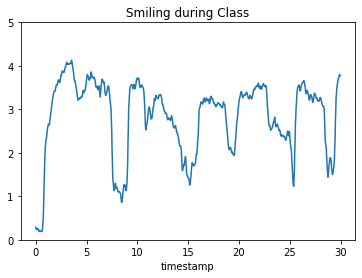

In [10]:
#% smiling
smiling = (df["AU12_c"])
per_smiling = (smiling.sum()/smiling.count())*100
print(per_smiling)


att = df['AU12_r']
from matplotlib import pyplot
series1 = att 
indsmile = dict(series1)
series1.plot()
pyplot.ylim(0,5)
pyplot.title("Smiling during Class")
pyplot.show()

In [5]:
total_frame = df["frame"].count()

#happy = ((df["AU06_c"] + df["AU12_c"])/2)
sadness = ((df["AU01_c"] + df["AU04_c"]+ df["AU15_c"])/3)
fear = ((df["AU01_c"] + df["AU02_c"]+ df["AU04_c"]+ df["AU05_c"]+ df["AU07_c"]+ df["AU20_c"]+ df["AU26_c"])/7)
anger = ((df["AU04_c"] + df["AU05_c"]+ df["AU07_c"]+ df["AU23_c"])/4)


#df["Happiness"] = happy
df["Sadness"] = sadness
df["Fear"] = fear
df["Angry"] = anger

Sadness_count = df[df["Sadness"]==1.0]
Sadness_count_frame = Sadness_count["frame"].count()
Sadness_time = ((Sadness_count_frame/total_frame)*100)
print(Sadness_time)

Fear_count = df[df["Fear"]==1.0]
Fear_count_frame = Fear_count["frame"].count()
Fear_time = ((Fear_count_frame/total_frame)*100)
print(Fear_time)

Angry_count = df[df["Angry"]==1.0]
Angry_count_frame = Angry_count["frame"].count()
Angry_time = ((Angry_count_frame/total_frame)*100)
print(Angry_time)

0.0
0.0
0.0


100.0


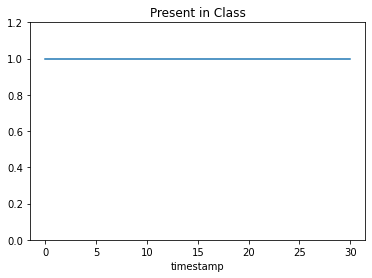

In [6]:
#% present in class
present = (df["success"])
per_present = (present.sum()/present.count())*100
print(per_present)

att = df['success']
from matplotlib import pyplot
series2 = att
indpresent = dict(series2)
pyplot.ylim(0,1.2)
series2.plot()
pyplot.title("Present in Class")
pyplot.show()

100.0


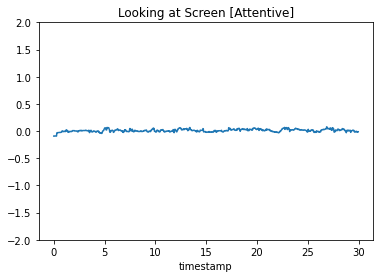

In [7]:
#looking at Camera [Attentive]
total_frame = df["frame"].count()
c_x_n = df[df["gaze_angle_x"]<-0.1]
c_y_n = df[df["gaze_angle_x"]>0.1]
not_looking_x = c_x_n["frame"].count()
not_looking_y = c_y_n["frame"].count()
not_looking = (not_looking_x+not_looking_y)
Looking_at_camera = (((total_frame-not_looking)/total_frame)*100)
print(Looking_at_camera)

att = df["gaze_angle_x"]
from matplotlib import pyplot
series3 = att
indattentive = dict(series3)
pyplot.ylim(-2,2)
series3.plot()
pyplot.title("Looking at Screen [Attentive]")
pyplot.show()

2.4471635150166855


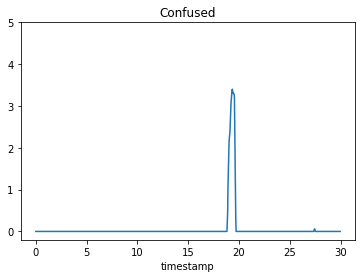

In [8]:
# %confused
confused = (df["AU04_c"])
per_confused = (confused.sum()/confused.count())*100
print(per_confused)

att = df["AU04_r"]
from matplotlib import pyplot
series4 = att
indconfused = dict(series4)
pyplot.ylim(-0.2,5)
series4.plot()
pyplot.title("Confused")
pyplot.show()

In [11]:
dates =np.round(list(indsmile.keys()),2)    
prices = np.round(list(indsmile.values()),2)
dates1 =np.round(list(indpresent.keys()),2)         
prices1 = np.round(list(indpresent.values()),2)
dates2 =np.round(list(indattentive.keys()),2)          
prices2 = np.round(list(indattentive.values()),2)
dates3 =np.round(list(indconfused.keys()),2)        
prices3 = np.round(list(indconfused.values()),2)

In [ ]:
import tkinter as tk                     
from tkinter import ttk 
import matplotlib
matplotlib.use("TkAgg")  # this is the backend of matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
import matplotlib.animation as animation
from matplotlib import style


root = tk.Tk() 
root.title("Are you happy with my Lecture? - Uncovering the Truth")
root.geometry("1300x950") 
tabControl = ttk.Notebook(root) 
  
tab1 = ttk.Frame(tabControl)
tab2 = ttk.Frame(tabControl)
tab3 = ttk.Frame(tabControl) 
tab4 = ttk.Frame(tabControl)
tab5 = ttk.Frame(tabControl)
tab6 = ttk.Frame(tabControl)
  
tabControl.add(tab1, text ='Candidates Smiling') 
tabControl.add(tab2, text ='Candidates Attentive')
tabControl.add(tab3, text ='Candidates Physical Presence')
tabControl.add(tab4, text ='Candidates Confused')
tabControl.add(tab5, text = 'Overall')
tabControl.add(tab6, text = 'Professor Report')


tabControl.pack(expand = 1, fill ="both") 
  
ttk.Label(tab1, text ="Hi Professor, Arnold was SMILING for "+str(int(per_smiling))+'%' " in your class", font=('Helvetica', 18, 'bold')).grid(column = 0, row = 0, padx = 30, pady = 30)   
ttk.Label(tab2, text ="Hi Professor, Arnold was "+ str(int(Looking_at_camera))+'%'+" ATTENTIVE in your class", font=('Helvetica', 18, 'bold')).grid(column = 0, row = 0,  padx = 30, pady = 30) 
ttk.Label(tab3, text ="Hi Professor, Arnold was "+ str(int(per_present))+'%'+" PHYSICALLY PRESENT in your class", font=('Helvetica', 18, 'bold')).grid(column = 0, row = 0,  padx = 30, pady = 30) 
ttk.Label(tab4, text ="Hi Professor, Arnold was "+ str(int(per_confused))+'%'+" CONFUSED in your class", font=('Helvetica', 18, 'bold')).grid(column = 0, row = 0,  padx = 30, pady = 30)
ttk.Label(tab5, text ="Hi Professor, The Overview of Arnold :", font=('Helvetica', 18, 'bold')).grid(column = 0, row = 0,  padx = 30, pady = 30)
ttk.Label(tab6, text ="Hi Professor, Your overall class Report:\nOverall "+str(over_happy)+'% of Students were Happy in your class\nOverall '+str(over_Physical)+'% of Students were Physically Present in your class\nOverall '+
              str(over_Attentive)+'% of Students were Attentive in your class\nOverall '+str(over_Confused)+'% of Students were confused in your class'
              , font=('Helvetica', 15, 'bold')).grid(column = 0, row = 0,  padx = 30, pady = 30)


#label_b1 = ttk.Label(tab1, text = "Button label 0,1").grid(column = 0, row = 1, padx = 30, pady = 30)
#label_b1 = ttk.Label(tab1, text = "Button label 1,1").grid(column = 1, row = 1, padx = 30, pady = 30)
#label_b1 = ttk.Label(tab1, text = "Button label 1,2").grid(column = 2, row = 1, padx = 30, pady = 30)


def plot(att2 =df["gaze_angle_x"] ): 
    # the figure that will contain the plot 
    fig = Figure(figsize = (5, 5), dpi = 100)    
    # adding the subplot 
    plot1 = fig.add_subplot(111) 
    # plotting the graph 
    plot1.plot(att2)
    plot1.set_title("Candidate's Attentive Analytics")
    plot1.set_xlabel("Timestamp in seconds")
    plot1.set_ylabel("Attention Variation")
    plot1.set_ylim(-2,2)
    canvas = FigureCanvasTkAgg(fig, master = tab2)  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window 

def smiling(att1=df['AU12_r']): 
    # the figure that will contain the plot 
    fig = Figure(figsize = (5, 5), dpi = 100) 
     
    #y = [i**2 for i in range(101)] # list of squares
    y = att1
    
    # adding the subplot 
    plot2 = fig.add_subplot(111)  
    plot2.plot(y) 
    plot2.set_ylim(0,3)
    plot2.set_title("Candidate's Happy Analytics")
    plot2.set_xlabel("Timestamp in seconds")
    plot2.set_ylabel("Extent of Smiling")
    canvas = FigureCanvasTkAgg(fig, master = tab1 )  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window 

def present(att3 =df["success"] ): 
    # the figure that will contain the plot 
    fig = Figure(figsize = (5, 5), dpi = 100)    
    # adding the subplot 
    plot3 = fig.add_subplot(111) 
    # plotting the graph 
    plot3.plot(att3)
    plot3.set_title("Candidate's Attentive Analytics")
    plot3.set_xlabel("Timestamp in seconds")
    plot3.set_ylabel("Physical Presence 1- Present 0- Absent")
    plot3.set_ylim(0,1.2)
    canvas = FigureCanvasTkAgg(fig, master = tab3)  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window

def confused(att3 =df["AU04_r"] ): 
    # the figure that will contain the plot 
    fig = Figure(figsize = (5, 5), dpi = 100)    
    # adding the subplot 
    plot4 = fig.add_subplot(111) 
    # plotting the graph 
    plot4.plot(att3)
    plot4.set_title("Candidate's Confused Analytics")
    plot4.set_xlabel("Timestamp in seconds")
    plot4.set_ylabel("Confused Variation")
    plot4.set_ylim(-0.2,3)
    canvas = FigureCanvasTkAgg(fig, master = tab4)  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window
    
def overall(smile =per_smiling, presence=per_present, attentive=Looking_at_camera, confused=per_confused):
    # creating the dataset 
    data = {'Smiling':smile, 'Physical Presence':per_present, 'Attentive':Looking_at_camera, 'Confused':per_confused} 
    courses = list(data.keys()) 
    values = list(data.values()) 
    fig = Figure(figsize = (10, 5), dpi = 100) 
    plot5 = fig.add_subplot(111) 
    plot5.bar(courses, values, color ='red',width = 0.4) 
    plot5.set_title("Candidate's Overview")
    plot5.set_xlabel("Attributes")
    plot5.set_ylabel("Percentage - %")
    canvas = FigureCanvasTkAgg(fig, master = tab5)  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window
    
def overall_Prof(smile =over_happy, presence=over_Physical, attentive=over_Attentive, confused=over_Confused):
    # creating the dataset 
    data = {'Happy':smile, 'Physical Presence':presence, 'Attentive':attentive, 'Confused':confused} 
    courses = list(data.keys()) 
    values = list(data.values()) 
    fig = Figure(figsize = (10, 5), dpi = 100) 
    plot5 = fig.add_subplot(111) 
    plot5.bar(courses, values, color ='red',width = 0.4) 
    plot5.set_title("Overview of the Class")
    plot5.set_xlabel("Attributes")
    plot5.set_ylabel("Percentage - %")
    canvas = FigureCanvasTkAgg(fig, master = tab6)  # creating the Tkinter canvas containing the Matplotlib figure  
    canvas.draw() 
    canvas.get_tk_widget().grid()  # placing the canvas on the Tkinter window


plot_button = tk.Button(master = tab2,  command = plot, height = 2,  width = 20, text = "Attentive Analytics") 
plot_button1 = tk.Button(master = tab1,  command = smiling, height = 2,  width = 20, text = "Smiling Analytics")
plot_button2 = tk.Button(master = tab3,  command = present, height = 2,  width = 22, text = "Physical Presence Analytics") 
plot_button3 = tk.Button(master = tab4,  command = confused, height = 2,  width = 22, text = "Confused Analytics")
plot_button4 = tk.Button(master = tab5,  command = overall, height = 2,  width = 22, text = "Overall Candidate")
plot_button5 = tk.Button(master = tab6,  command = overall_Prof, height = 2,  width = 22, text = "Overall Class Report")
plot_button.grid()
plot_button1.grid()# place the button in main window 
plot_button2.grid()
plot_button3.grid()
plot_button4.grid()
plot_button5.grid()
root.mainloop()